In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
runs = [100000, 500000, 1000000, 2000000, 2500000]

create_time = []
search_time = []
for run in runs:
    fast_ll_ctime = pd.read_csv(f"../results_remote/FAST_KNN_NO_ObjIndex_LL_create_timeline_{run}_100000.csv", names=['time']).reset_index()
    fast_ll_ctime['name'] = 'fast (linked list)'
    
    # ck_ctime = pd.read_csv("../results/CkQST_KNN_NO_create_timeline_2500000_100000.csv", names=['time']).reset_index()
    # ck_ctime['name'] = 'ckqst'
    
    run_create_time = pd.concat([fast_ll_ctime])
    run_create_time['run'] = run
    create_time.append(run_create_time)
    
    fast_ll_stime = pd.read_csv(f"../results_remote/FAST_KNN_NO_ObjIndex_LL_search_timeline_{run}_100000.csv", names=['time']).reset_index()
    fast_ll_stime['name'] = 'fast (linked list)'
    
    # ck_stime = pd.read_csv("../results/CkQST_KNN_NO_search_timeline_2500000_100000.csv", names=['time']).reset_index()
    # ck_stime['name'] = 'ckqst'
    
    run_search_time = pd.concat([fast_ll_stime])
    run_search_time['run'] = run
    search_time.append(run_search_time)
    
    # fast_summary = pd.read_csv("../results/FAST_KNN_NO_ObjIndex.csv")[-1:]
    # fast_al_summary = pd.read_csv("../results/FAST_KNN_NO_ObjIndex_AL.csv")[-1:]
    # fast_ll_summary = pd.read_csv("../results/FAST_KNN_NO_ObjIndex_LL.csv")[-1:]
    # ck_summary = pd.read_csv("../results/CkQST_KNN_NO.csv")[-1:]
    # summary = pd.concat([fast_summary, fast_al_summary, fast_ll_summary, ck_summary])

create_time = pd.concat(create_time)
create_time['time'] = create_time['time'] / 1000000

search_time = pd.concat(search_time)
search_time['time'] = search_time['time'] / 1000000

In [3]:
create_time

index      time                name      run
0              0  5.146185  fast (linked list)   100000
1              1  6.498584  fast (linked list)   100000
2              2  0.301391  fast (linked list)   100000
3              3  0.215171  fast (linked list)   100000
4              4  0.342663  fast (linked list)   100000
...          ...       ...                 ...      ...
2499995  2499995  0.579570  fast (linked list)  2500000
2499996  2499996  0.086530  fast (linked list)  2500000
2499997  2499997  0.658437  fast (linked list)  2500000
2499998  2499998  0.014873  fast (linked list)  2500000
2499999  2499999  0.429035  fast (linked list)  2500000

[6100000 rows x 4 columns]

# Total time

In [4]:
# total_ctime = summary.loc[:, ['name', 'creation_time']]
# total_ctime['creation_time'] = total_ctime['creation_time'] / (2500000 * 1000000)
# sns.barplot(x='name', y='creation_time', data=total_ctime)
# plt.xticks(rotation=45)

In [5]:
# total_stime = summary.loc[:, ['name', 'search_time']]
# total_stime['search_time'] = total_stime['search_time'] / (100000 * 1000000)
# sns.barplot(x='name', y='search_time', data=total_stime)
# plt.xticks(rotation=45)

## Creation time

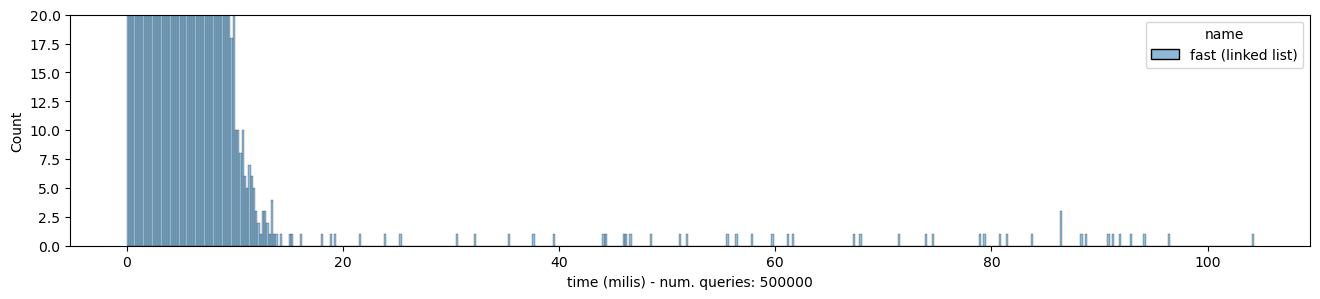

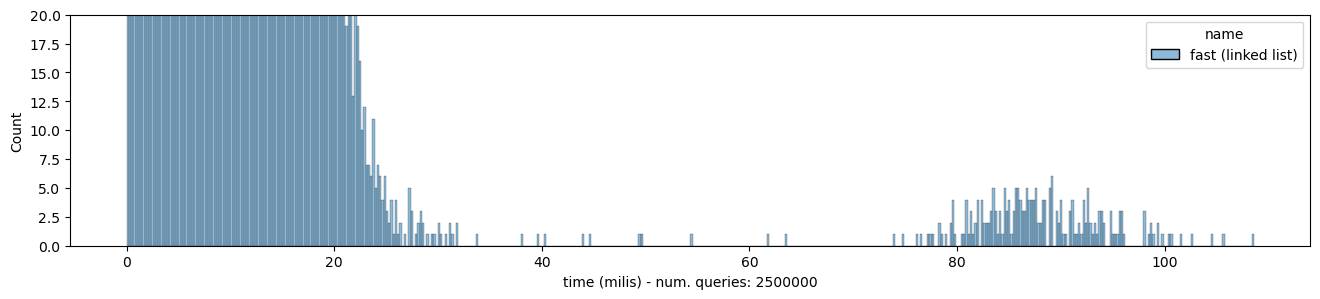

In [6]:
for run in create_time['run'].drop_duplicates().values:
    plt.figure(figsize=(16,3))
    sns.histplot(x='time', bins=500, hue='name', multiple='layer', data=create_time[create_time['run'] == run])
    plt.xlabel('time (milis) - num. queries: ' + str(run))
    plt.ylim(0, 20)

**Miserable queries**

Queries that takes too much time (>100 milis). 

In [7]:
miserable_queries = create_time[create_time['time'] > 100].sort_values('time', ascending=False)
miserable_queries

index        time                name      run
520794    520794  108.600925  fast (linked list)  2500000
1821275  1821275  105.649853  fast (linked list)  2500000
1559516  1559516  104.582279  fast (linked list)  2500000
479196    479196  104.274570  fast (linked list)   500000
1527965  1527965  102.717546  fast (linked list)  2500000
427358    427358  101.613123  fast (linked list)  2500000
1517575  1517575  100.655561  fast (linked list)  2500000
589687    589687  100.543956  fast (linked list)  2500000

In [10]:
# step = 500000
# for i in range(0, 2500000, step):
plt.figure(figsize=(16,3))
sns.lineplot(x='index', y='time', hue='run', style='name', data=create_time)
plt.xlabel('timestamp')

Text(0.5, 0, 'timestamp')

/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Relative time (FAST vs CkQST)

In [ ]:
# for run in create_time['run'].drop_duplicates().values:
#     relative_create = create_time[create_time['name'] == 'fast (linked list)']['time'] - create_time[create_time['name'] == 'ckqst']['time']
    
#     plt.figure(figsize=(16,8))
#     sns.lineplot(data=relative_create)
#     plt.xlabel('timestamp')

# Search time

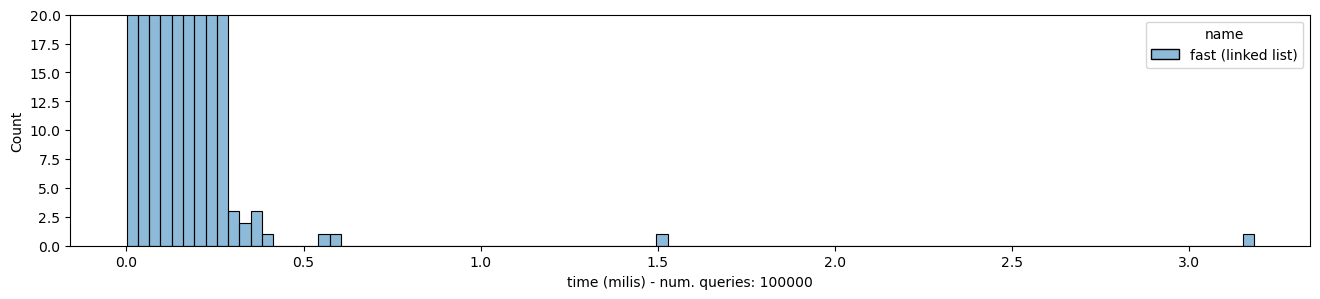

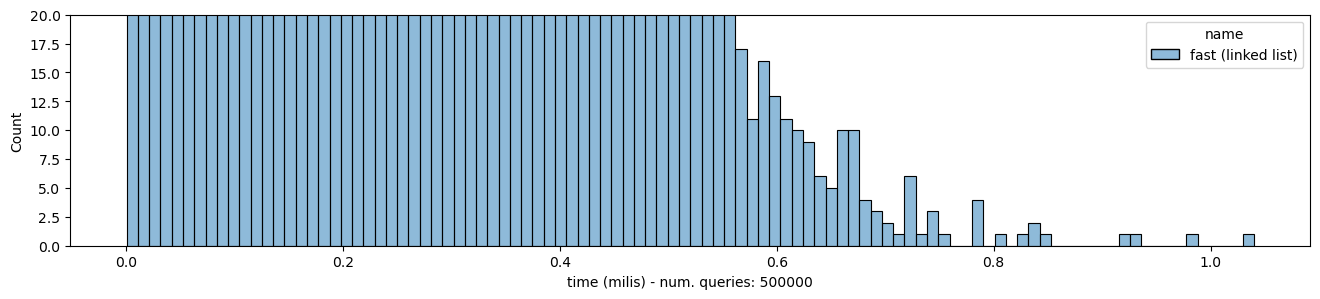

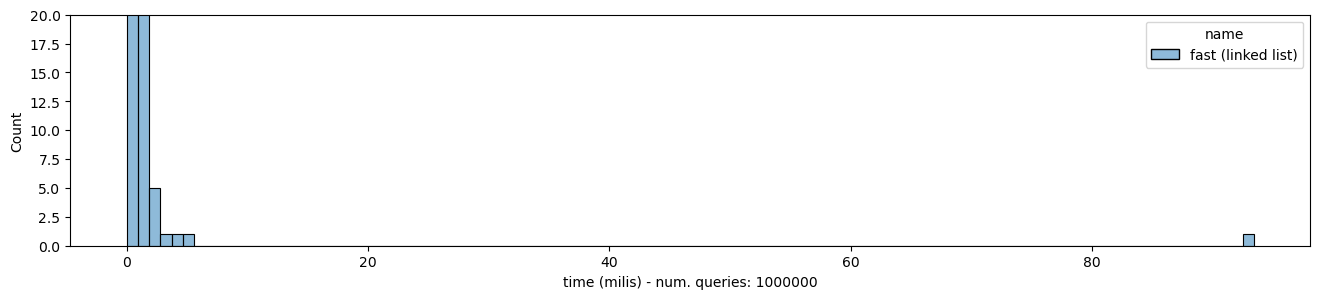

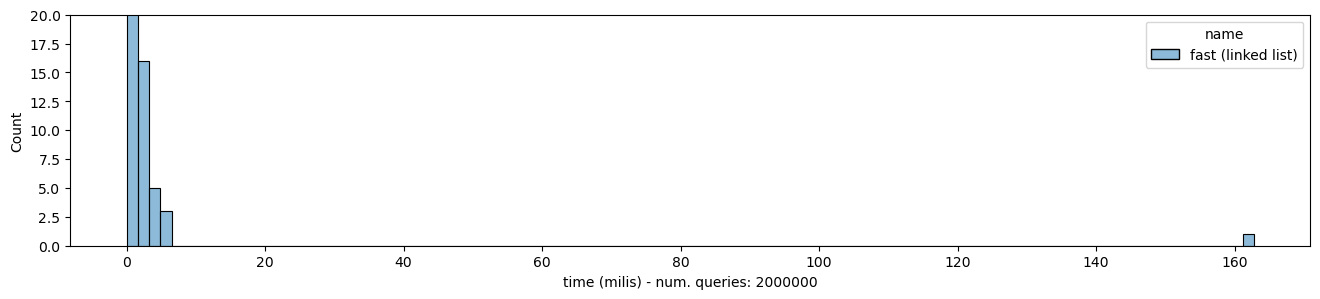

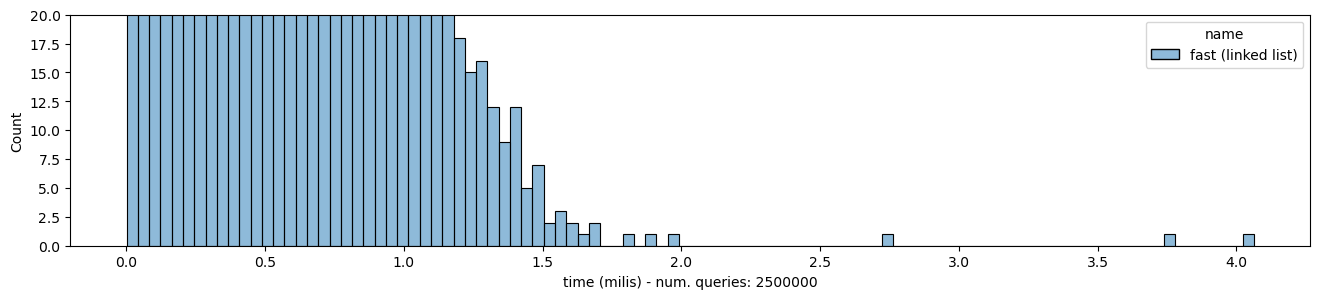

In [14]:
for run in create_time['run'].drop_duplicates().values:
    plt.figure(figsize=(16,3))
    sns.histplot(x='time', bins=100, hue='name', multiple='layer', data=search_time[search_time['run'] == run])
    plt.xlabel('time (milis) - num. queries: ' + str(run))
    plt.ylim(0, 20)

Text(0.5, 0, 'timestamp')

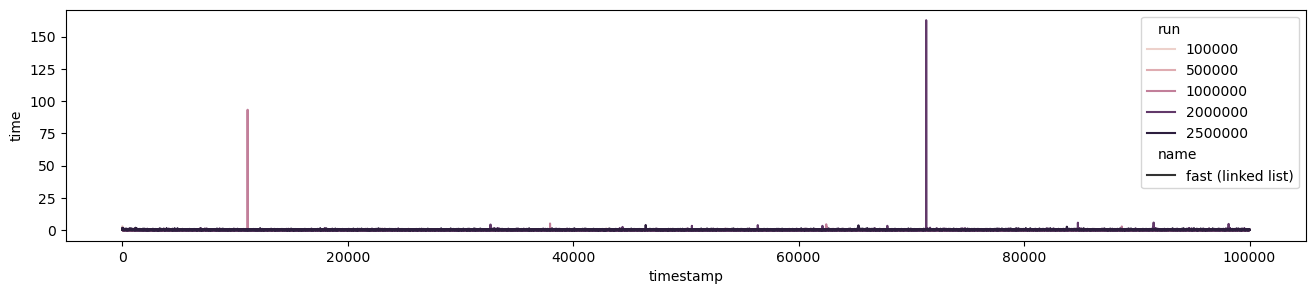

In [15]:
plt.figure(figsize=(16,3))
sns.lineplot(x='index', y='time', hue='run', style='name', data=search_time)
plt.xlabel('timestamp')

Relative time (FAST vs CkQST)

In [ ]:
# relative_search = search_time[search_time['name'] == 'fast']['time'] - search_time[search_time['name'] == 'ckqst']['time']

# plt.figure(figsize=(16,8))
# sns.lineplot(data=relative_search)
# plt.xlabel('timestamp')